In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from PIL import Image

from sklearn.metrics import confusion_matrix

In [2]:
# define global variables

# set categories mapping to number
categories = {'apple':0, 'banana':1, 'orange':2, 'mixed':3}

# set a standard size to which all the images will be resized
standard_size = (300,300)

# set path to save models
model_save_path = 'ImageClassifier_saved_model.h5'

In [3]:
# onehot-encoding of categories
def encode_onehot(pos, n_rows):
    # 4 classes
    y_onehot = [0] * len(categories) 

    y_onehot[pos] = 1 
    y_onehots = [y_onehot] * n_rows 

    return np.array(y_onehots)

In [4]:
# read data of all images in a folder and return ndarrays
def read_img_data(path):
    for file in os.listdir(path):
        # skip hidden files
        if file[0] == '.':  
            continue

        # reading image file into memory
        img = Image.open("{}/{}".format(path, file))

        #resize image to the same size
        resized_img = img.resize(standard_size)

        #convert image to 'RGB' mode (3 color channels)
        converted_img = resized_img.convert('RGB')

        # convert image to numpy array
        data = np.array([np.asarray(converted_img)])

        # union previous data and current data
        try:
            x = np.concatenate((x, data))
        except:
            x = data

    return np.reshape(x, (-1, standard_size[0],standard_size[1],3)) 

In [5]:
#read train or test data from a folder and generate label data (according to subfolder name)
def prep_data(path):
    for category in categories:
        #read data from different folders
        data = read_img_data(path + category)

        #union previous data and current data of a new category
        try:
            x = np.concatenate((x, data))
        except:
            x = data       

        # construct the onehot-encodings for a digit's data
        y_onehots = encode_onehot(categories[category], data.shape[0])
        try:
            y = np.concatenate((y, y_onehots))
        except:
            y = y_onehots           

    return x, y

In [6]:
#draw the number of each category in one histogram
def visualize_category(y_data):
    # to do
    return

In [6]:
# get the untrained model
def create_model():
    model = tf.keras.Sequential()

    # Convolutional Layer to extracts features
    model.add(tf.keras.layers.Conv2D(filters=32,
        kernel_size=(3, 3), activation='relu', input_shape=(standard_size[0],standard_size[1],3)))
    # Pooling layer to reduce dimension
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    # Dropout layer to regularize the network
    model.add(tf.keras.layers.Dropout(0.2))
    # flatten layer to get 1D vector
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.2))
    # dense layer; using l2 regularizer
    model.add(tf.keras.layers.Dense(units=128, kernel_regularizer=
                                    tf.keras.regularizers.L2(0.01),activation='relu'))    

    # output layer: performs classification; the image is either 0, 1, 2, 3
    model.add(tf.keras.layers.Dense(units=4, activation='softmax'))    

    # build the model; using categorical_crossentropy as loss function for multi-class
    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                    metrics=['accuracy'])
    
    print(model.summary())
    return model

In [7]:
# get the trained model
def train_model(x_train,y_train):
    model = create_model()

    # fit model; normalize x_train by dividing by 255
    history = model.fit(x = x_train / 255, y = y_train, epochs = 10)

    # plot loss curve
    fig, ax = plt.subplots()
    plt.plot(history.history['loss'])
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Error')
    ax.set_title('Loss curve')
    plt.show()

    # save model
    model.save(model_save_path)
    print('Model saved')
    
    return model

In [8]:
# test model;
def test_model(model):
    #get test_data 
    x_test, y_test = prep_data('test/')

    # print loss and accuracy
    loss,accuracy = model.evaluate(x = x_test/255, y = y_test)
    print('loss = ', loss)
    print('accuracy = ', accuracy)

    # get predictions and 
    # transfer one-hot to integer encoding for confusion matrix
    y_pred = model.predict(x_test/255)
    y_test_int = np.argmax(y_test, axis = 1)
    y_pred_int = np.argmax(y_pred, axis = 1)

    print('Confusion Matrix:')
    print(confusion_matrix(y_test_int, y_pred_int,labels = [0,1,2,3] ))
    

In [9]:
#Main Program

# train new model or load saved model
while True:
    user_Input = input('Train new model/Load saved model? [T/L]')
    if user_Input.lower() == 't':
        x_train, y_train = prep_data('train/')
        model = train_model(x_train, y_train)
        break
    elif user_Input.lower() == 'l':
        model = tf.keras.models.load_model(model_save_path)
        break
    else:
        print('Please input "t" or "l"!')

#test model
test_model(model)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.9014 - loss: 2.6199
loss =  2.635711669921875
accuracy =  0.8833333253860474
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Confusion Matrix:
[[18  1  0  0]
 [ 1 17  0  0]
 [ 0  0 18  0]
 [ 1  3  1  0]]


In [ ]:
# Below are temporary codes
# 主程序跑一次时间太久，先进行分段测试
# 获得训练数据
x_train, y_train = prep_data('train/')
print(x_train.shape)
print('the distribution of labels of training datas:', sum(y_train))

c:\Users\SHANG\.conda\envs\myMLEnv\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(240, 300, 300, 3)
the distribution of labels of training datas: [75 73 72 20]


c:\Users\SHANG\.conda\envs\myMLEnv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 710432)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 710432)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    90,935,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,936,836 (346.90 MB)

 Trainable params: 90,936,836 (346.90 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.2613 - loss: 52.1468
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4550 - loss: 14.7586
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6319 - loss: 8.8174
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8838 - loss: 6.7531
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8875 - loss: 5.7135
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9451 - loss: 4.6202
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9793 - loss: 3.7694
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9781 - loss: 3.1942
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9920 - loss: 2.7014
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9780 - loss: 2.3732


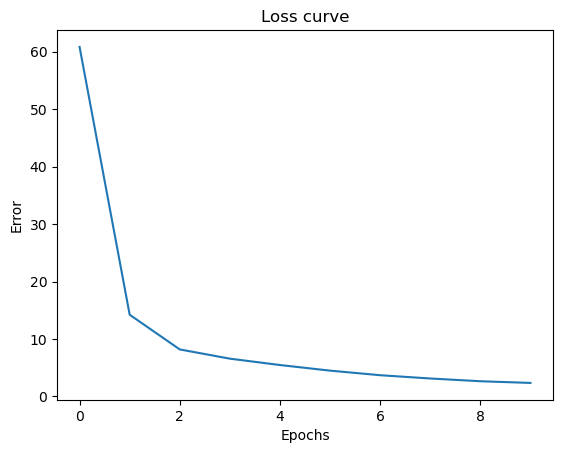

Model saved:ImageClassifier_saved_model.h5


In [ ]:
#模型训练
model = train_model(x_train, y_train)

In [18]:
#模型验证
x_test, y_test = prep_data('test/')

loss,accuracy = model.evaluate(x = x_test/255, y = y_test)
print('loss = ', loss)
print('accuracy = ', accuracy)

y_pred = model.predict(x_test/255)
y_test_int = np.argmax(y_test, axis = 1)
y_pred_int = np.argmax(y_pred, axis = 1)

print('Confusion Matrix:')
print(confusion_matrix(y_test_int, y_pred_int,labels = [0,1,2,3] ))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.8576 - loss: 2.9409
loss =  2.9087116718292236
accuracy =  0.8333333134651184
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Confusion Matrix:
[[17  1  1  0]
 [ 1 17  0  0]
 [ 1  1 16  0]
 [ 1  3  1  0]]
